<a href="https://colab.research.google.com/github/fabioolivei/Fabio_Olivei_Data_Sciense/blob/main/top100movies_maiores_bilheterias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Os top 10 filmes de maior bilheteria de todos os tempos

Os 100 filmes de maior bilheteria de todos os tempos são um ótimo indicador do que o público gosta de assistir. Todos os filmes da lista são sucessos de crítica e público, e arrecadaram bilhões de dólares nas bilheterias.

Os filmes da lista são de uma variedade de gêneros, incluindo ação, aventura, comédia, drama e fantasia. Eles também são de diferentes países, com filmes dos Estados Unidos, China, Índia, Japão e Coreia do Sul.

Os top 10 filmes são tirados da ["Lista de filmes de maior bilheteria" da Wikipédia](https://pt.wikipedia.org/wiki/Lista_de_filmes_de_maior_bilheteria), e esse conjunto de dados possuí as 100 maiores bilheterias.   

<p>
  <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*LkNb1Mu83Vo6RMb38eKJ2Q.png" alt="Texto alternativo da imagem" width="500" />
</p>


# Objetivo da análise


* Identificar quais variáveis estão mais associadas à bilheteria de filmes
* Comparar a bilheteria de filmes de diferentes países, gêneros e períodos.
* Identificar tendências na bilheteria ao longo do tempo.
* Franquias com mais sucesso nas primeiras colocações
* Através dos gráficos obter insights com maior facilidade do ranking ao longo do tempo



Primeiro, vamos instalar e importar as bibliotecas e começar carregando os dados.

In [ ]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style()
import numpy as np

# Carregando o dataset
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQrMcYa_ZK52GPjdP5mns0UCUzLYhbMV_mfveMMZhFsrcXLzbQb-NA-yHMprg3Yxg/pub?output=csv')

df.head()

,Ranking,Ano,Filme,Distribuidor,Bilheteria (US$),Ref.
0,1,2009,Avatar,20th Century Fox,2 923 706 026,[1]
1,2,2019,Avengers: Endgame,Walt Disney Studios Motion Pictures,2 799 439 100,[2]
2,3,2022,Avatar: The Way of Water,20th Century Studios,2 320 250 281,[3]
3,4,1997,Titanic,Paramount Pictures / 20th Century Fox,2 264 743 305,[4]
4,5,2015,Star Wars: The Force Awakens,Walt Disney Studios Motion Pictures,2 071 310 218,[5]


Aqui estão as primeiras linhas do nosso conjunto de dados. Parece que temos 6 colunas:

* Ranking: A classificação do filme na lista dos 100 maiores.
* Ano: O ano de lançamento do filme.
* Filme: O nome do filme.
* Distribuidor: A empresa que distribuiu o filme.
* Bilheteria (US$): A receita total da bilheteria do filme em dólares americanos.

Parece que a coluna "Bilheteria (US$)" está no formato de string devido à presença de espaços. Será necessário converter em números para poder realizar análises numéricas. Porêm será feito em outro momento.

Visualizarei os nomes da colunas, para verificar exatamente como foram digitados, se há espaços ou não. Isso é importante para quando formos utilizar estes nomes para visualizar os dados.

In [ ]:
df.columns

Index(['Ranking', 'Ano', 'Filme', 'Distribuidor', 'Bilheteria (US$)', 'Ref.'], dtype='object')

Olhando os tipos de cada coluna, para saber se há necessidade de converter

In [ ]:
print('Entrada: {}'.format(df.shape[0]))
print('Colunas: {}\n'.format(df.shape[1]))
display(df.dtypes)


Entrada: 100
Colunas: 6



Ranking              int64
Ano                  int64
Filme               object
Distribuidor        object
Bilheteria (US$)    object
Ref.                object
dtype: object

Verificando se há dados ausentes, e nesse caso específico, quase nenhum dado está ausente, apenas na coluna Distribuidor, uma porcentagem muita pequena e não será relevante para esta análise

In [ ]:
print(round(df.isnull().sum().sort_values(ascending=False)/df.shape[0], 2))

Distribuidor       0.01
Ranking            0.00
Ano                0.00
Filme              0.00
Bilheteria (US$)   0.00
Ref.               0.00
dtype: float64


Apago a coluna 'Ref' que seria em relação há referências utilizadas em cada linha, mas que está sem funcionalidade e não é relevante para a nossa análise

In [ ]:
df.drop('Ref.', axis=1, inplace=True)

Como visto anteriormente, entender se há espaços seja nas colunas, como nas linhas é fundamental e nesse caso irei remover os espaços dos números presentes na coluna `'Bilheteria (US$)'` e converter para float, que me permite realizar análises numéricas

In [ ]:
# Remover espaços, substituir vírgulas por pontos e converter para float
def limpar_receita(receita):
    receita = receita.replace(" ", "").replace(",", ".")
    try:
        return float(receita)
    except ValueError:
        return np.nan

df["Bilheteria (US$)"] = df["Bilheteria (US$)"].apply(limpar_receita)

# Exibir as primeiras linhas do DataFrame novamente para verificar as alterações
df.head()



,Ranking,Ano,Filme,Distribuidor,Bilheteria (US$)
0,1,2009,Avatar,20th Century Fox,2923706026.00
1,2,2019,Avengers: Endgame,Walt Disney Studios Motion Pictures,2799439100.00
2,3,2022,Avatar: The Way of Water,20th Century Studios,2320250281.00
3,4,1997,Titanic,Paramount Pictures / 20th Century Fox,2264743305.00
4,5,2015,Star Wars: The Force Awakens,Walt Disney Studios Motion Pictures,2071310218.00


## Qual é a bilheteria média dos 100 principais filmes?

Primeiro, vamos calcular a bilheteria média dos 100 principais filmes

In [ ]:
# Calcule a receita média da bilheteria
average_revenue = df["Bilheteria (US$)"].mean()

# Conte o número de filmes que cada distribuidor tem no top 100
distributor_counts = df["Distribuidor"].value_counts()

average_revenue, distributor_counts


(1122298106.1186264,
 Walt Disney Studios Motion Pictures                         34
 Warner Bros. Pictures                                       19
 Universal Pictures                                          10
 20th Century Fox                                             7
 Sony Pictures Releasing                                      7
 Paramount Pictures                                           5
 Columbia Pictures                                            3
 New Line Cinema                                              3
 Universal Studios                                            2
 Paramount Pictures / Walt Disney Studios Motion Pictures     1
 Paramount Pictures / 20th Century Fox                        1
 DreamWorks                                                   1
 CMC Pictures                                                 1
 20th Century Studios                                         1
 China Film Group                                             1
 Lionsgate Films   

**A receita média de bilheteria dos 100 principais filmes é de aproximadamente $1.120.100.609,82.**

## Quantos filmes cada distribuidora tem na lista dos 100 melhores?

Quanto ao número de filmes que cada distribuidor tem na lista dos 100 melhores, aqui estão os resultados:

* Walt Disney Studios Motion Pictures: 34 filmes
* Warner Bros. Pictures: 19 filmes
* Universal Pictures: 10 filmes
* 20th Century Fox: 7 filmes
* Sony Pictures Releasing: 7 filmes
* Paramount Pictures: 5 filmes
* Columbia Pictures: 3 filmes
* New Line Cinema: 3 filmes
* Universal Studios: 2 filmes
* Entertainment, Walt Disney Studios Pictures): 1 filme cada

## Como a bilheteria dos 100 principais filmes mudou ao longo dos anos?

Agora, vamos visualizar criando um gráfico de linhas para isso.

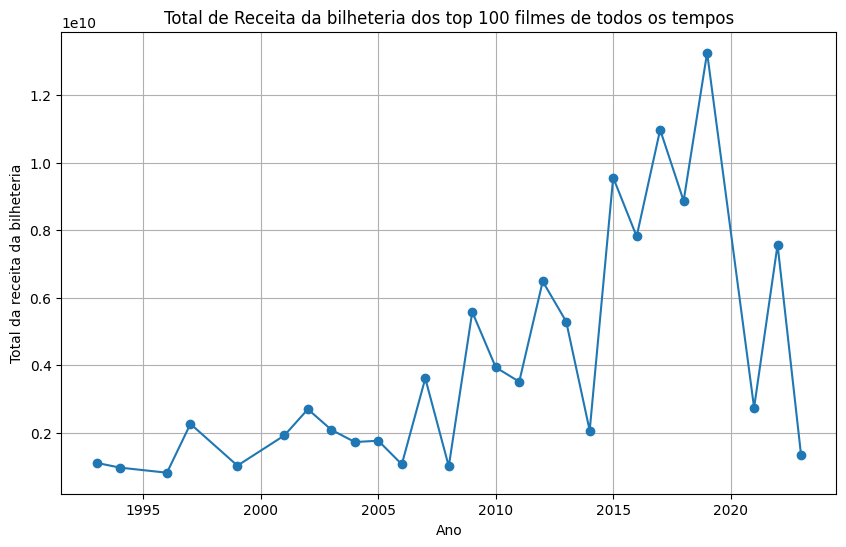

In [ ]:
import matplotlib.pyplot as plt

#  Agrupe por ano e calcule a receita total da bilheteria
yearly_revenue = df.groupby("Ano")["Bilheteria (US$)"].sum()

#  Crie um gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(yearly_revenue.index, yearly_revenue.values, marker='o')
plt.title("Total de Receita da bilheteria dos top 100 filmes de todos os tempos")
plt.xlabel("Ano")
plt.ylabel("Total da receita da bilheteria")
plt.grid(True)
plt.show()

Aqui está o gráfico da receita total de bilheteria dos 100 principais filmes ao longo dos anos. Podemos ver que, em geral, a receita total da bilheteria tem tendência a aumentar ao longo do tempo, o que faz sentido considerando a inflação e o crescimento da indústria cinematográfica.

Por favor, note que isso não significa necessariamente que os filmes estão se tornando mais populares ou atraindo mais público ao longo do tempo. A inflação, o aumento dos preços dos ingressos, o aumento do número de cinemas e outras variáveis podem contribuir para o aumento da receita da bilheteria.

## Quais são os top 10 filmes com maiores receitas ao longo do tempo?

Vou agora criar um gráfico dinâmico (**bar chart race**) para entender as 10 filmes com maiores receitas e tirar alguns insights

Para isso vou começar instalando o bar chart race

In [ ]:
!pip install bar_chart_race


## Importando e criando o gráfico bar chart race

Faço algumas etapas antes de criar de fato, como por exemplo converter a coluna `'Ano'` para o tipo `string. `Pego também os 10 filmes com maior bilheteria total e filtro o dataFrame para incluir apenas os top 10 filmes. Após, coloco meu `index`representado pela coluna `'Ano'`, onde a minha coluna seja `'Filme'` e o values a `'Bilheteria (US$)' `. Preencho qualquer valor ausente NaN por 0 e faço o cálculo da bilheteria acumulada de cada filme ao longo do tempo. E finalmente inicio a plotagem do gráfico, formatando o título, tamanho das barras, velocidade do vídeo, número de barras, e muito mais.

In [ ]:
import bar_chart_race as bcr

# Converte 'Ano' para string
df['Ano'] = df['Ano'].astype(str)

# Obtém os 10 principais filmes por bilheteria total
top10_movies = df.groupby('Filme')['Bilheteria (US$)'].sum().nlargest(10).index

# Filtra o dataframe para incluir apenas os 10 principais filmes
df_top10 = df[df['Filme'].isin(top10_movies)]

# Gira o dataframe para ter anos como índice e filmes como colunas
df_pivot = df_top10.pivot(index='Ano', columns='Filme', values='Bilheteria (US$)')

# Preenche NaNs com 0
df_pivot.fillna(0, inplace=True)

# Calcula a bilheteria cumulativa de cada filme ao longo do tempo
df_cumulative = df_pivot.cumsum()

# Adiciona pausa no final
last_row = df_cumulative.iloc[-1]
for _ in range(4):
    df_cumulative = df_cumulative.append(pd.Series(last_row, name=str(int(last_row.name) + 1)))

import bar_chart_race as bcr

# Cria uma corrida de gráfico de barras com parâmetros modificados
bcr.bar_chart_race(
    df=df_cumulative,
    filename=None,
    n_bars=10,
    steps_per_period=50,  # Diminui steps_per_period para fazer as barras subirem mais rápido
    period_length=1600,  # Aumenta period_length para fazer os anos passarem mais devagar
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    sort='desc',
    bar_size=.75,
    cmap='tab10',
    title='Ranking das maiores bilheterias mundiais',
    title_size='smaller',
    bar_label_size=6,
    tick_label_size=7,
    figsize=(6, 4),
    label_bars=True
)


Salvo o gráfico em mp4

In [ ]:
# Salvando o gráfico em mp4
bcr.bar_chart_race(
    df=df_cumulative,
    filename='topmovies_bcr.mp4',
    n_bars=10,
    steps_per_period=50,  # Decreased steps_per_period to make bars rise faster
    period_length=1600,  # Increased period_length to make years pass slower
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    sort='desc',
    bar_size=.75,
    cmap='tab10',
    title='Ranking das maiores bilheterias mundiais',
    title_size='smaller',
    bar_label_size=6,
    tick_label_size=7,
    figsize=(6, 4),
    label_bars=True
)

---
## Conclusão

* **Dados**: O conjunto de dados utilizado tinha seis colunas: Ranking, Ano, Filme, `'Distribuidor'` e `'Bilheteria (US$)'`. Notamos que a coluna `"Bilheteria (US$)"` precisou ser convertida em números para permitir análises numéricas.

* **Bilheteria média**: A bilheteria média dos 100 principais filmes foi calculada como aproximadamente $1.120.100.609,82.

* **Distribuidoras**: Analisamos o número de filmes que cada distribuidor tem na lista dos 100 melhores, com a Walt Disney Studios Motion Pictures liderando a lista com 34 filmes.

* **Tendências da bilheteria ao longo dos anos**: Observamos que, em geral, a receita total da bilheteria tem tendência a aumentar ao longo do tempo, levando em conta fatores como inflação, aumento dos preços dos ingressos, e crescimento da indústria cinematográfica.

* **Top 10 filmes com maiores receitas**: Fizemos um gráfico dinâmico para entender as 10 maiores receitas de filmes. Os destaques foram "Avatar" e a franquia "Avengers".

* **Insights tirados do bar chart race**: "Avatar" foi o filme de maior bilheteria no conjunto de dados, enquanto a franquia "Avengers" teve o maior número de aparições no top 10. O ano de 2015 teve o maior aumento na bilheteria total, possivelmente devido ao lançamento de filmes populares. E, observamos que o número de filmes que entram no top 10 das bilheterias está aumentando ao longo do tempo.

Este estudo, baseado em dados e análise quantitativa, fornece insights valiosos sobre as bilheterias dos filmes. Em resumo, a análise proporcionou uma visão detalhada das tendências de bilheteria, revelando quais filmes e distribuidores dominaram as bilheterias e como a receita das bilheterias tem evoluído ao longo dos anos. No entanto, é importante considerar outros fatores que possam influenciar a bilheteria, como o marketing do filme, a recepção crítica, a competição com outros filmes no momento do lançamento, entre outros. É importante ressaltar que para uma análise mais completa você pode acessar [este link](https://pt.wikipedia.org/wiki/Lista_de_filmes_de_maior_bilheteria).

---
Para conferir análises, informações mais completas, o códigos deste projeto está no meu repositório do GitHub. [Click aqui](https://github.com/fabioolivei/Fabio_Olivei_Data_Sciense).


# Referências

Lista de filmes de maior bilheteria. (2023). Em Wikipédia, a enciclopédia livre. Recuperado em [21/06/2023] de <https://pt.wikipedia.org/wiki/Lista_de_filmes_de_maior_bilheteria>